In [2]:
import pandas as pd
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#view first six rows of dataset
data[0:6]

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572


<AxesSubplot:xlabel='balance', ylabel='default'>

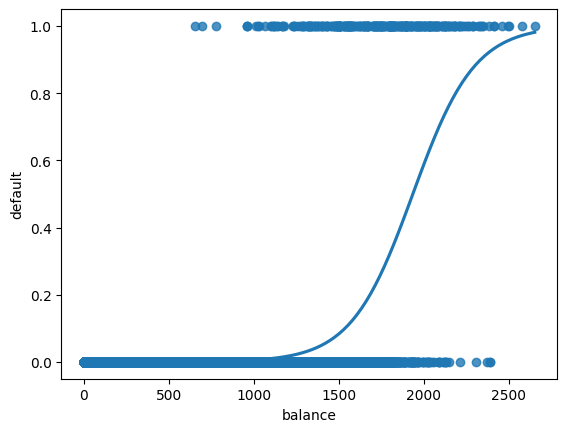

In [4]:
import seaborn as sns
x = data['balance']
y = data['default']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='balance', ylabel='default'>

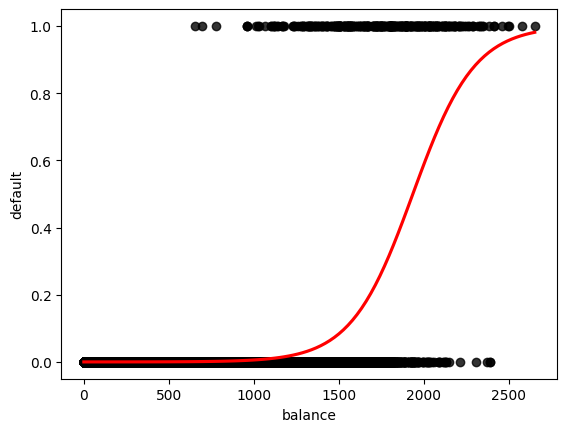

In [8]:
#define the predictor variable and the response variable
x = data['balance']
y = data['default']

#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

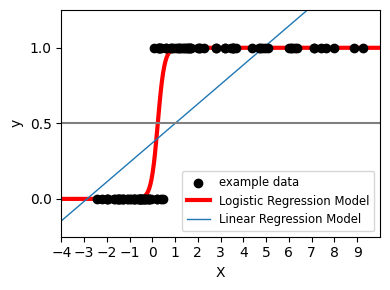

In [14]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()